In [1]:
import mlflow
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_IoT_Network_Intrusion_Dataset import Dataset_IoT_Network_Intrusion_Dataset
from experiment import Experiment
from datetime import datetime
from ids import IoTAnomalyDetector


In [2]:
#current_time = datetime.now().strftime('%m/%d_%H:%M')
mlflow.set_tracking_uri('file:///tmp/mlruns')
mlflow.set_experiment(f"Experiment_conpare_k")


<Experiment: artifact_location='file:///tmp/mlruns/701929061024168437', creation_time=1702878249388, experiment_id='701929061024168437', last_update_time=1702878249388, lifecycle_stage='active', name='Experiment_conpare_k', tags={}>

Running experiment with k=3


/Users/ham/codes/IDS_IoT/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


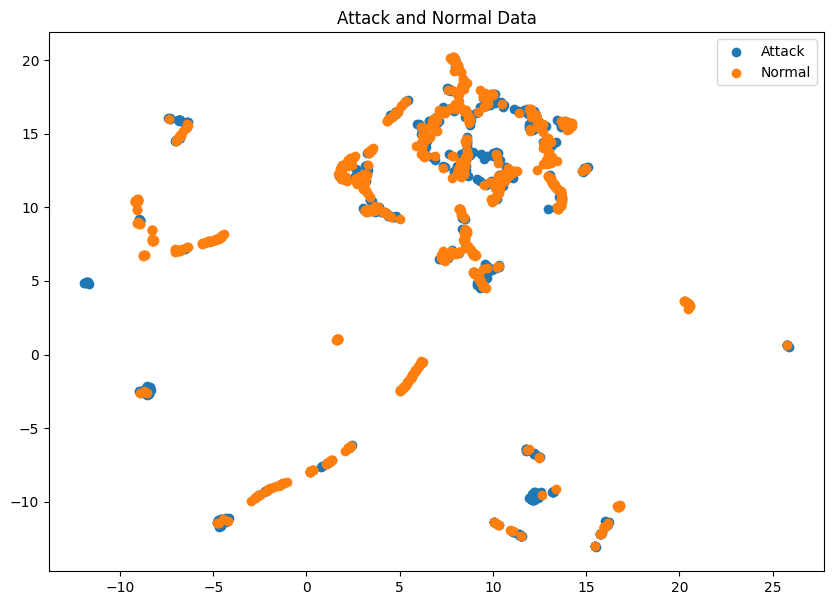

/Users/ham/codes/IDS_IoT/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


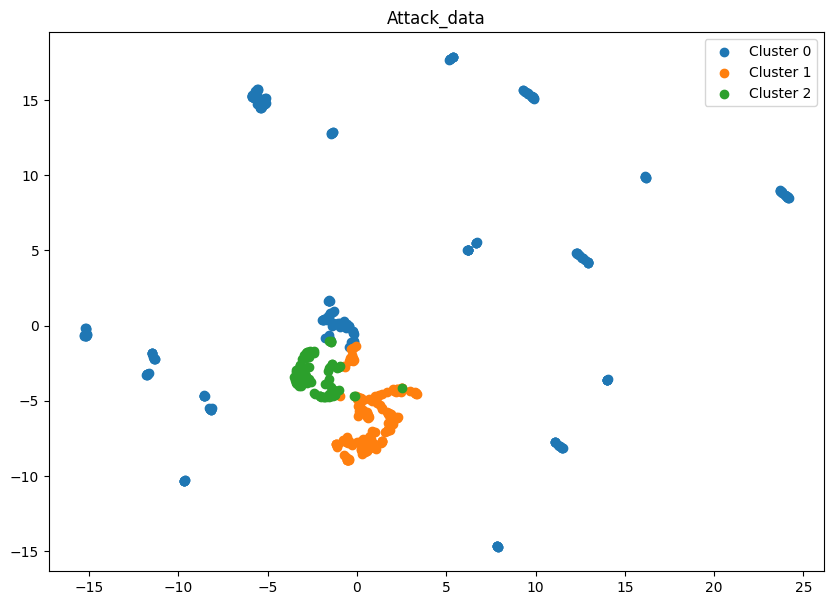

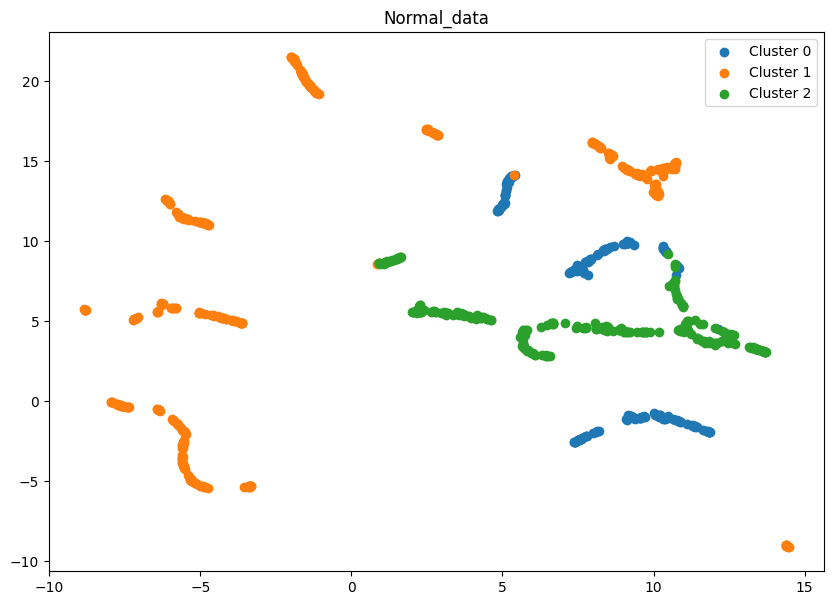

Progress: 100.00%

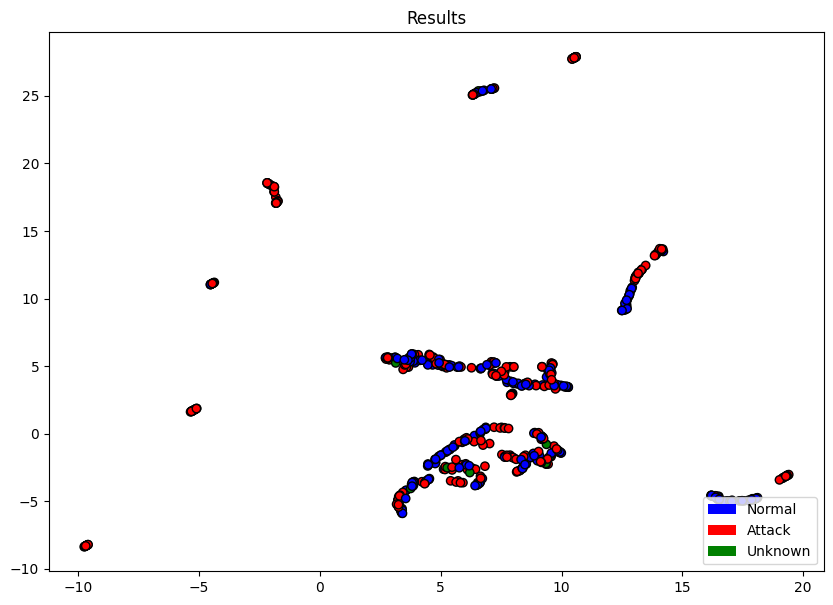

[0, 1, 0, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, -1, 1, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, -1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, -1, 1, -1, 1, 0, 1, 1, 0, 0, -1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, -1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 

/Users/ham/codes/IDS_IoT/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


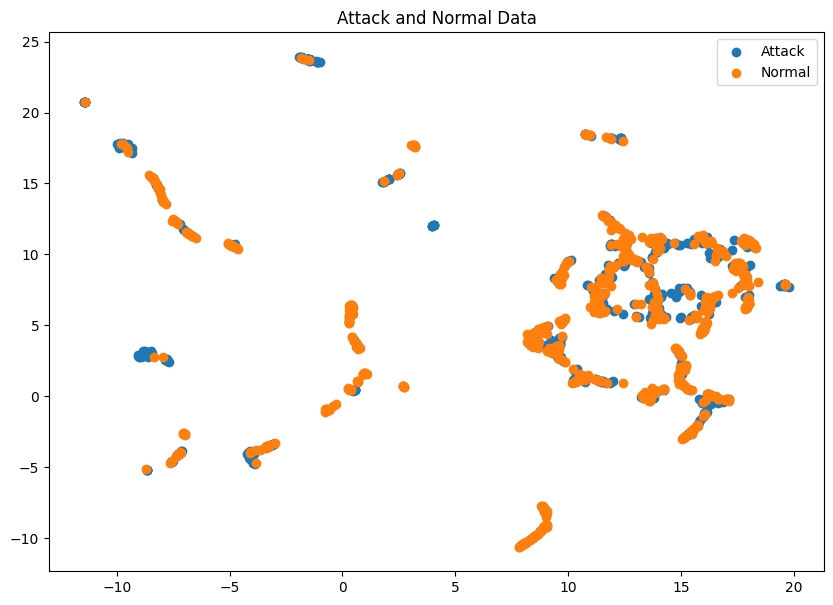

/Users/ham/codes/IDS_IoT/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


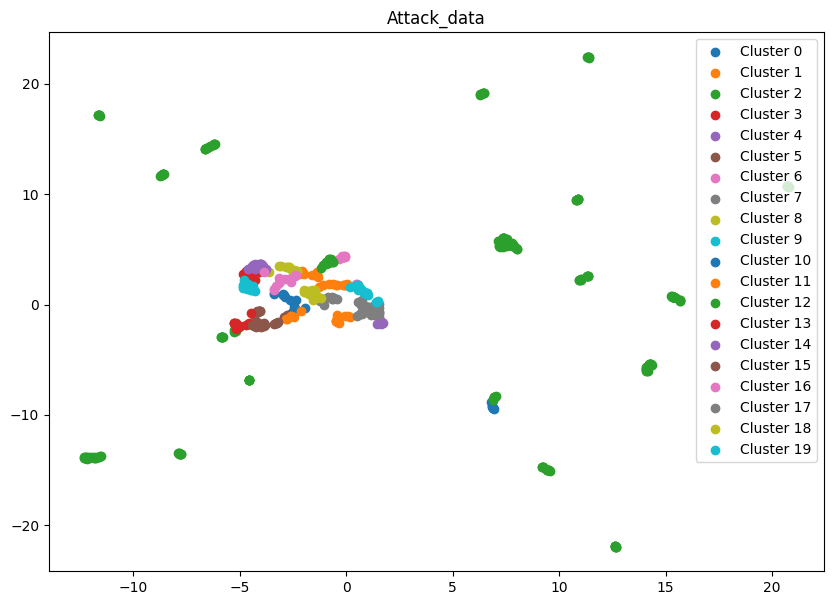

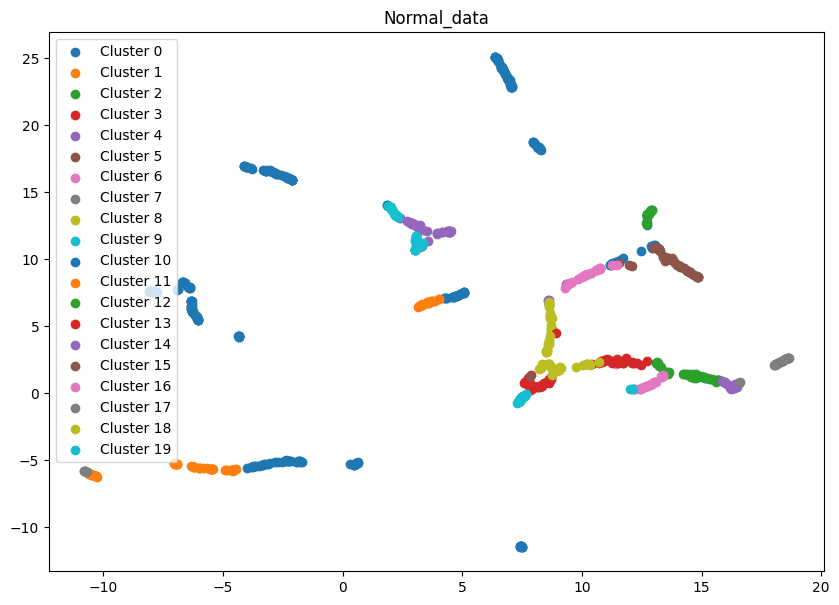

Progress: 100.00%

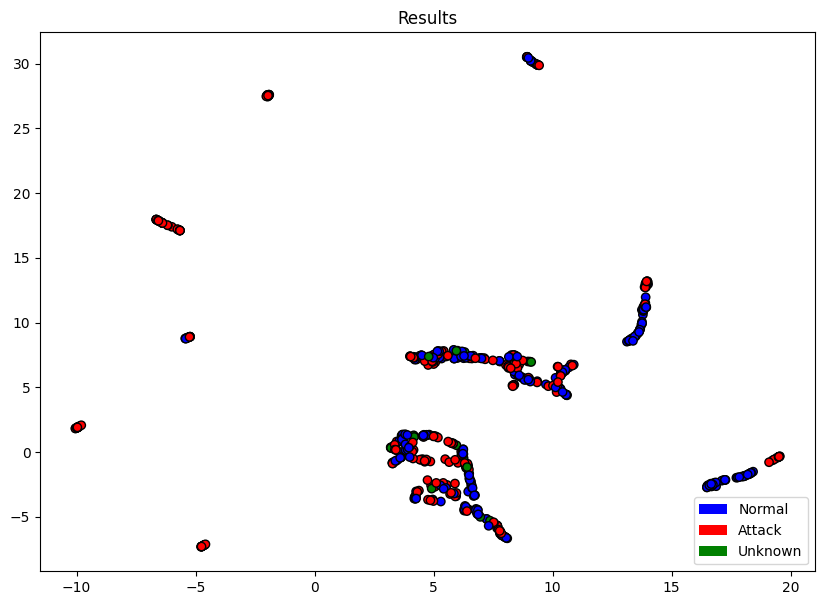

[0, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, -1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, -1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, -1, 0, 1, 1, 0, 0, -1, 0, 0, -1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, -1, 1, 1, 0, 0, -1, 0, -1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, -1, 0, 1, 0, 1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, -1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, -1, 1, 0, 0, -1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, -1, 1, 0, 0, 1

/Users/ham/codes/IDS_IoT/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


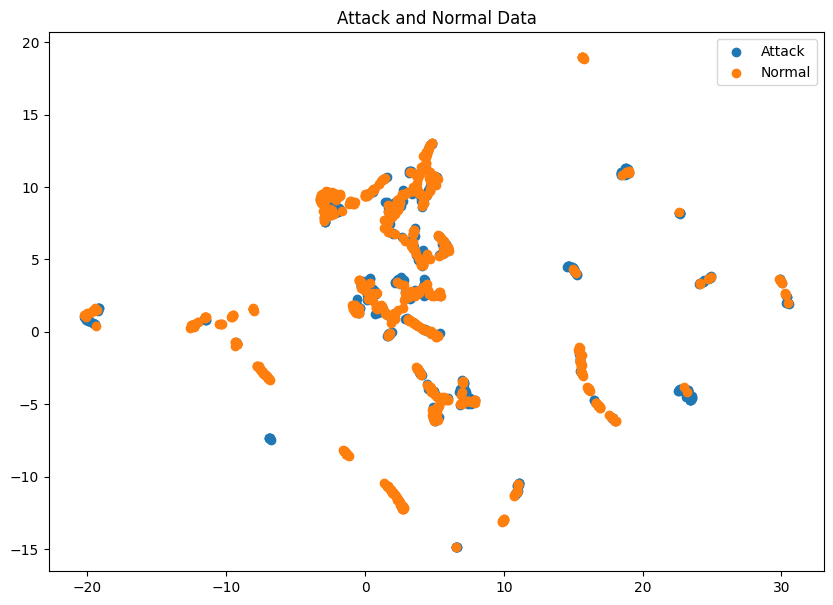

/Users/ham/codes/IDS_IoT/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


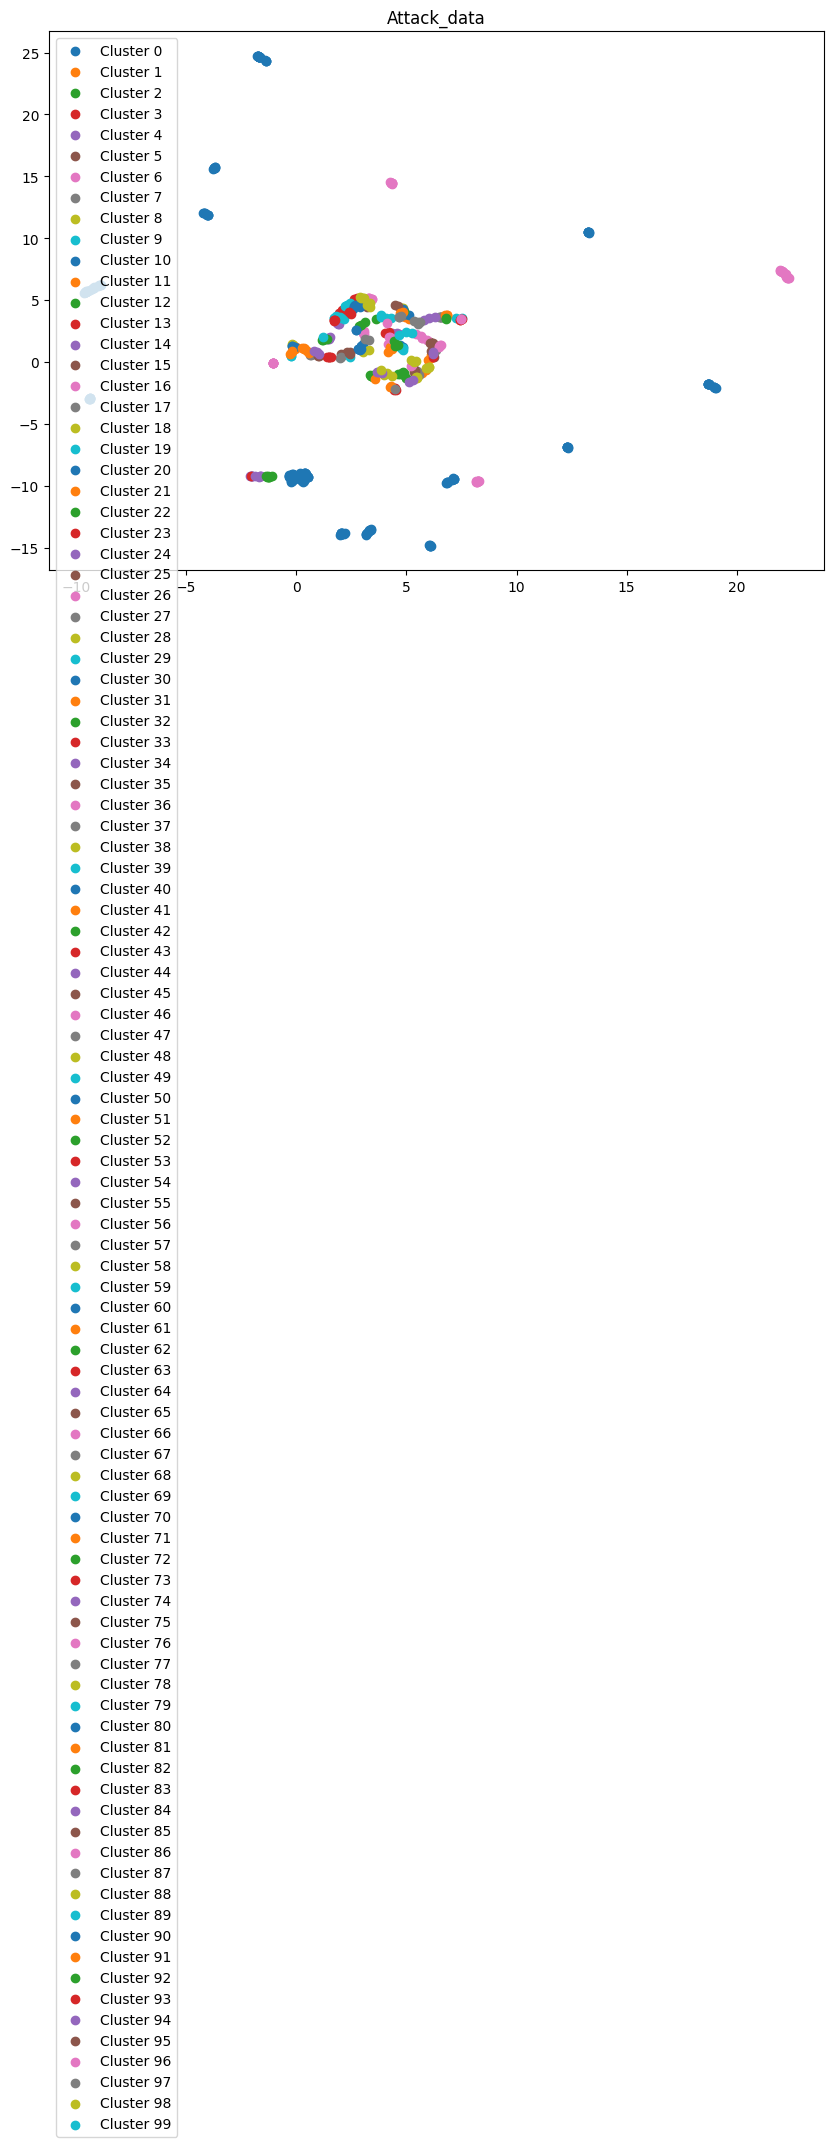

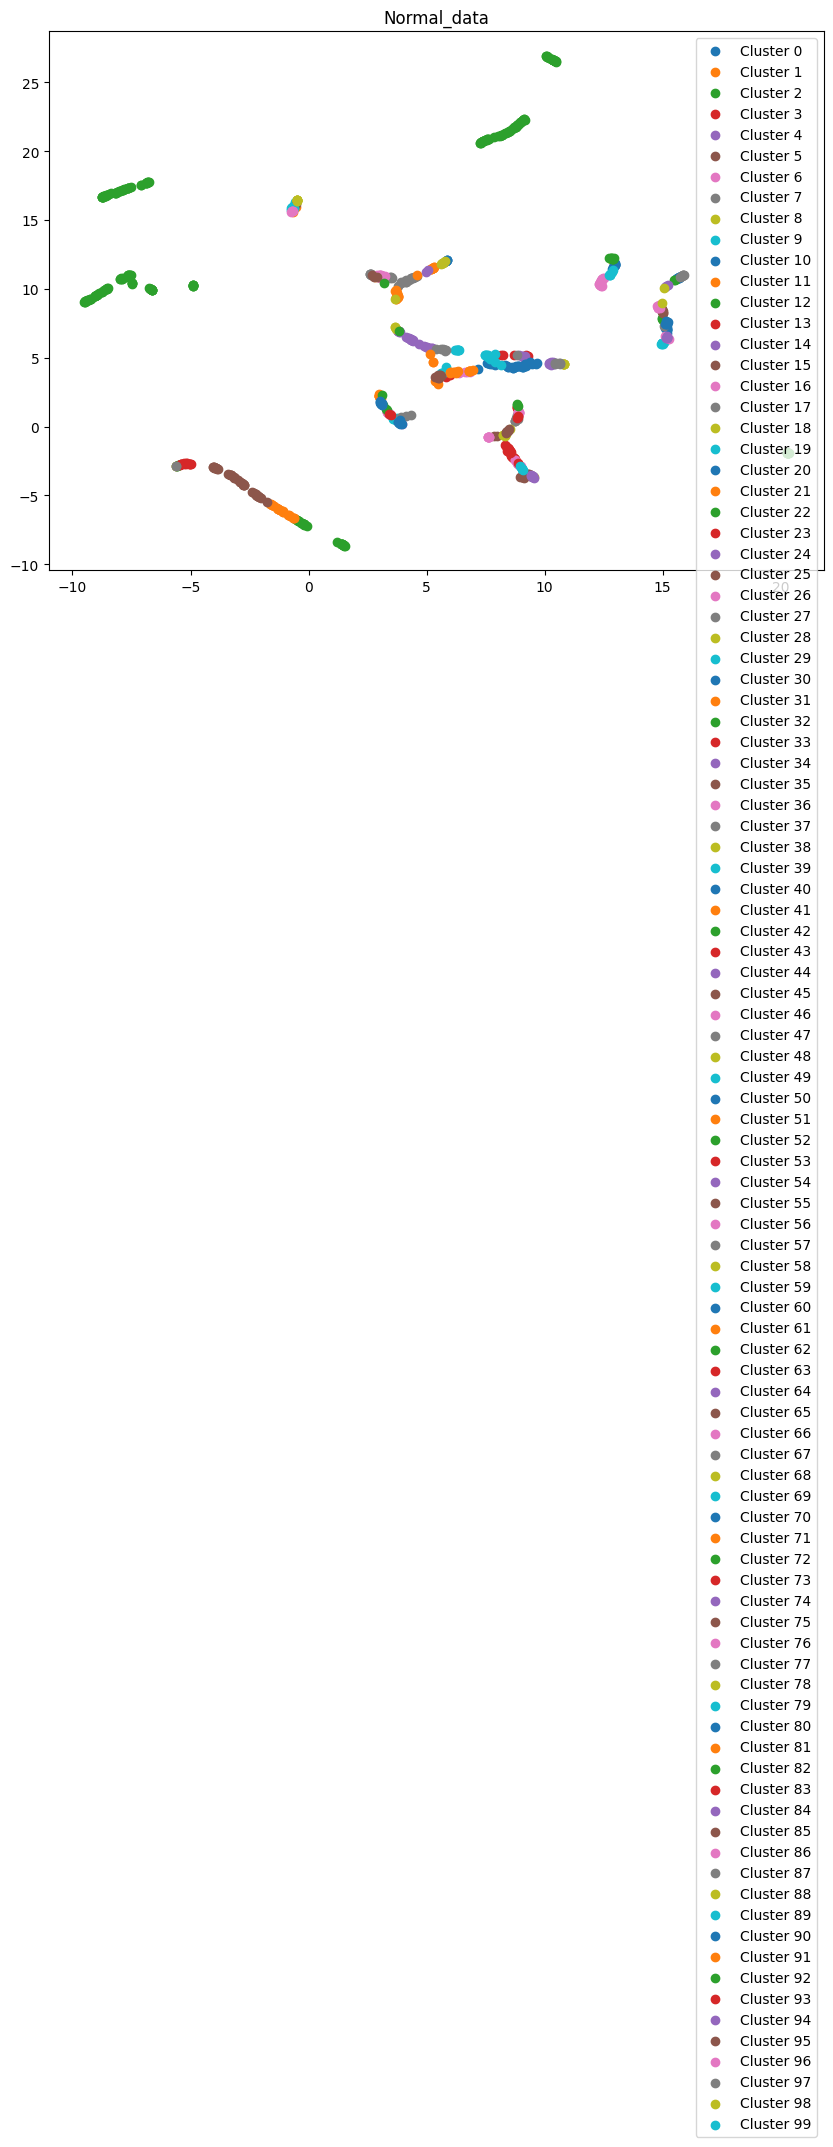

KeyboardInterrupt: 

In [3]:
    #filename = "config_IoT_Network_Intrusion_Dataset_lowonehot.json"
    #dataset = Dataset_IoT_Network_Intrusion_Dataset(config_filename=filename)

    #filename = "config_ML_EdgeIIoT_dataset.json"
    #dataset = Dataset_ML_EdgeIIoT_dataset(config_filename=filename)
    
    filename = "config_UNSW_NB15.json"
    dataset = Dataset_UNSW_NB15(config_filename=filename)

    exp = Experiment(dataset.data, dataset.labels, dataset.config)
    k_values = [3, 20]

    for k in k_values:
        print(f"Running experiment with k={k}")
        exp._run_experiment(model_cls=IoTAnomalyDetector, model_params={"k": k , "n_features" : 30})

    #print("MLflowのUIで結果を表示するには、以下のコマンドを実行してください:")
    #print("mlflow ui --backend-store-uri file:///tmp/mlruns")
